In [3]:
# !pip install kaggle


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats
from sklearn.preprocessing import StandardScaler

import re
import os

In [28]:
# !kaggle datasets download danagerous/sleep-data

In [29]:
#RUN THIS TO GET THE DATASET
# !unzip dataset.zip

In [30]:
df = pd.read_csv('sleepdata.csv', sep=';')
df_2 = pd.read_csv('sleepdata_2.csv', sep=';')
df_2['Mood'].isna().sum()
df.head()
df2 = df.drop('Heart rate', axis=1)
for column in df.columns:
    print(f"Column: {column}, Missing values: {df[column].isna().sum()}")

Column: Start, Missing values: 0
Column: End, Missing values: 0
Column: Sleep quality, Missing values: 0
Column: Time in bed, Missing values: 0
Column: Wake up, Missing values: 641
Column: Sleep Notes, Missing values: 235
Column: Heart rate, Missing values: 725
Column: Activity (steps), Missing values: 0


In [31]:
df['Sleep Notes'] = df['Sleep Notes'].fillna('No notes')
df['Time in bed'] = df['Time in bed'].apply(lambda x: x + ':00')
df.head()

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32:00,:),No notes,59.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16:00,:|,Stressful day,72.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30:00,:|,No notes,57.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32:00,NaN,No notes,NaN,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44:00,:),Drank coffee:Drank tea,68.0,0


In [32]:
# sleep_notes_counts = df['Sleep Notes'].value_counts()
df['Activity (steps)'].value_counts()

Activity (steps)
0        418
6430       2
12892      2
3763       2
4153       2
        ... 
3588       1
2756       1
3417       1
4076       1
2291       1
Name: count, Length: 449, dtype: int64

In [33]:
def categorize_sleep_notes(notes, category_keywords):
    for keyword in category_keywords:
        if keyword.lower() in notes.lower():
            return 1
    return 0

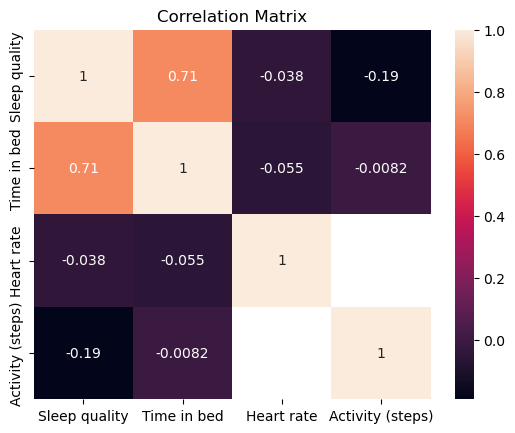

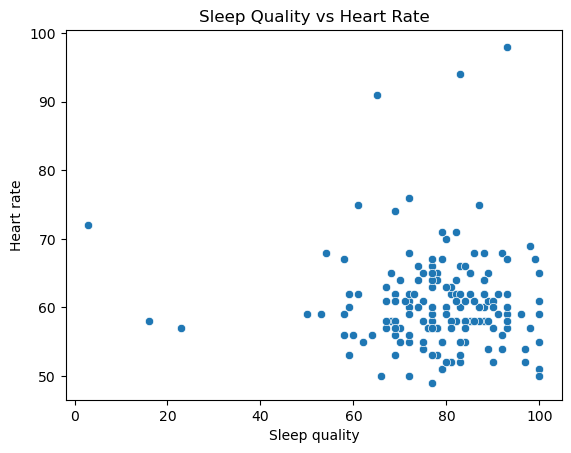

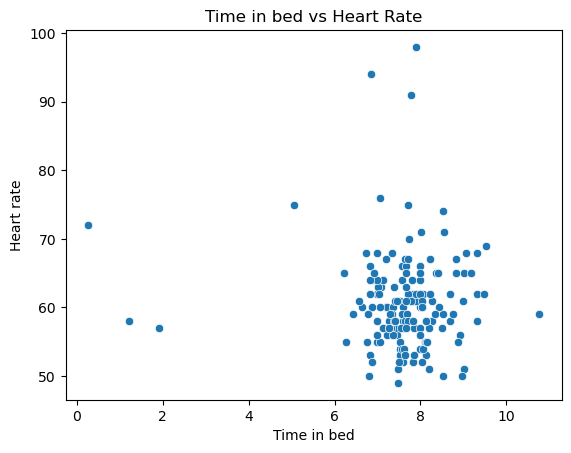

In [34]:
# observing relation of heart rate vs sleep quality and time in bed 

# convert to numeric format
df_updated = df.copy()
df_updated['Sleep quality'] = df_updated['Sleep quality'].str.replace('%', '').astype(float)
df_updated['Time in bed'] = round(pd.to_timedelta(df_updated['Time in bed']).dt.total_seconds() / 3600,2)
numeric_columns = df_updated.drop(['Start', 'End', 'Sleep Notes', 'Wake up'], axis=1)
corr_matrix = numeric_columns.corr()

#correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

sns.scatterplot(x='Sleep quality', y='Heart rate', data=df_updated)
plt.title('Sleep Quality vs Heart Rate')
plt.show()

sns.scatterplot(x='Time in bed', y='Heart rate', data=df_updated)
plt.title('Time in bed vs Heart Rate')
plt.show()

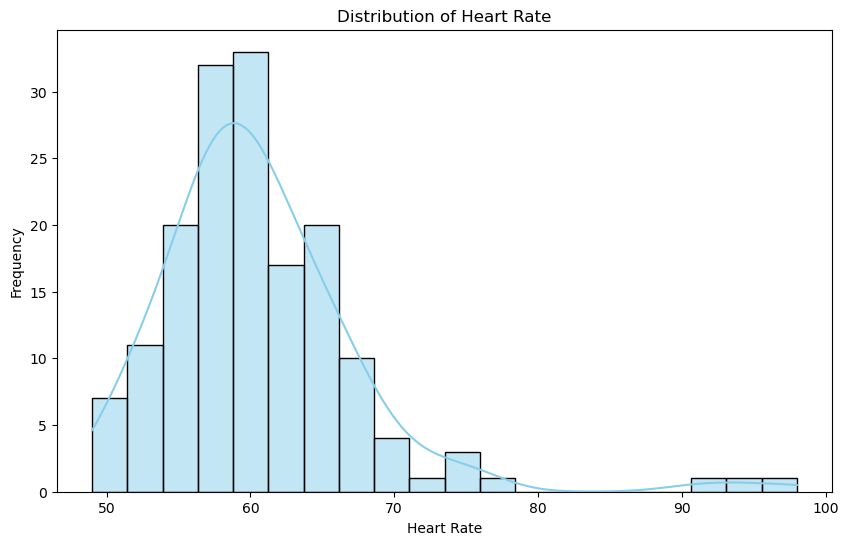

/opt/software/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


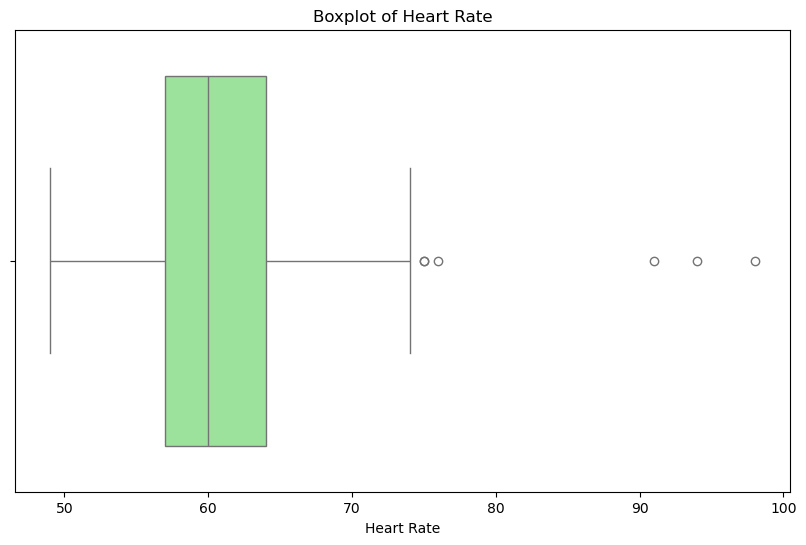

Skewness of Heart Rate: 2.1302720995595354


In [35]:
#distribution of heart rate
plt.figure(figsize=(10, 6))
sns.histplot(df_updated['Heart rate'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

# Plot boxplot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_updated['Heart rate'], color='lightgreen')
plt.title('Boxplot of Heart Rate')
plt.xlabel('Heart Rate')
plt.show()
heart_rate_skewness = df_updated['Heart rate'].skew()
print(f"Skewness of Heart Rate: {heart_rate_skewness}")

In [36]:
hr_median = df_updated['Heart rate'].median()
df_updated['Heart rate'] = df_updated['Heart rate'].fillna(hr_median)

In [37]:
# df_updated

In [38]:
df_updated['Wake up'] = df_updated['Wake up'].fillna(':|')

In [39]:
# categorizing the sleep notes
# OBSERVATION 1: DOES THE CAFEEINE CONSUMPTION OR OTHER FACTORS FROM NOTES AFFECT SLEEP QUALITY
def categorize_sleep_notes(notes, category_keywords):
    for keyword in category_keywords:
        if keyword.lower() in notes.lower():
            return 1
    return 0

caffeine_keywords = ['drank coffee', 'drank tea']
exercise_keywords = ['worked out']
stress_keywords = ['stressful day']
df_updated['Caffeine Consumption'] = df_updated['Sleep Notes'].apply(lambda x: categorize_sleep_notes(x, caffeine_keywords))
df_updated['Exercise'] = df_updated['Sleep Notes'].apply(lambda x: categorize_sleep_notes(x, exercise_keywords))
df_updated['Stressed'] = df_updated['Sleep Notes'].apply(lambda x: categorize_sleep_notes(x, stress_keywords))

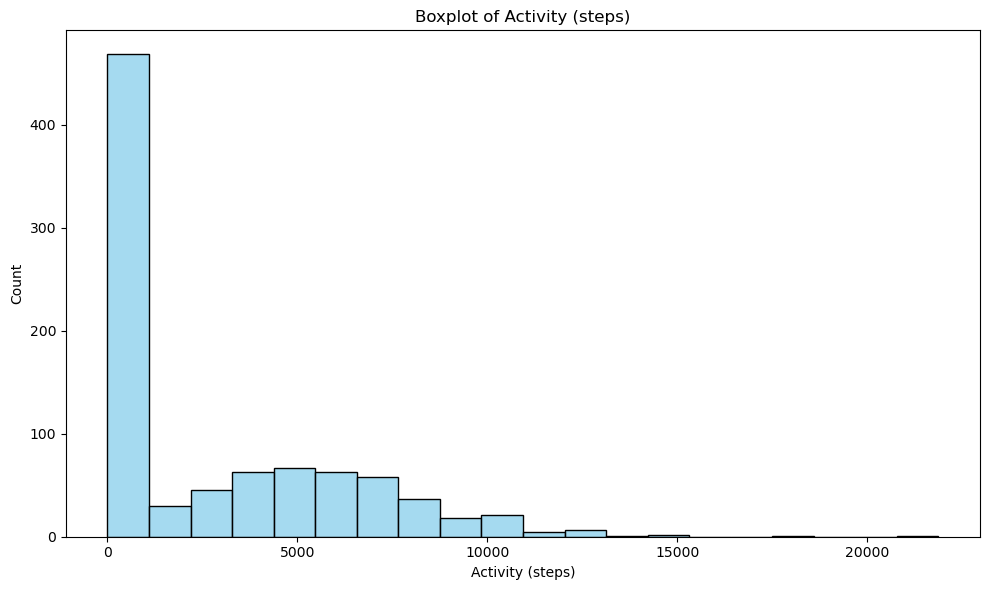

In [40]:
# visualizing acitvity to consider whether it is needed
plt.figure(figsize=(10, 6))
sns.histplot(x=df_updated['Activity (steps)'], color='skyblue')
plt.title('Boxplot of Activity (steps)')
plt.xlabel('Activity (steps)')
plt.tight_layout()
plt.show()

/opt/software/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


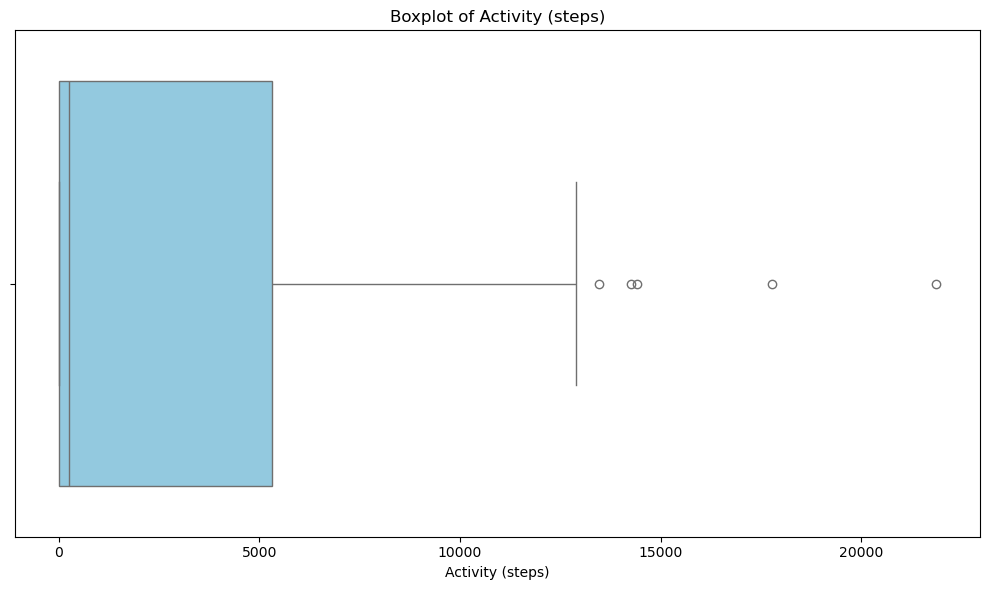

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_updated['Activity (steps)'], color='skyblue')
plt.title('Boxplot of Activity (steps)')
plt.xlabel('Activity (steps)')
plt.tight_layout()
plt.show()

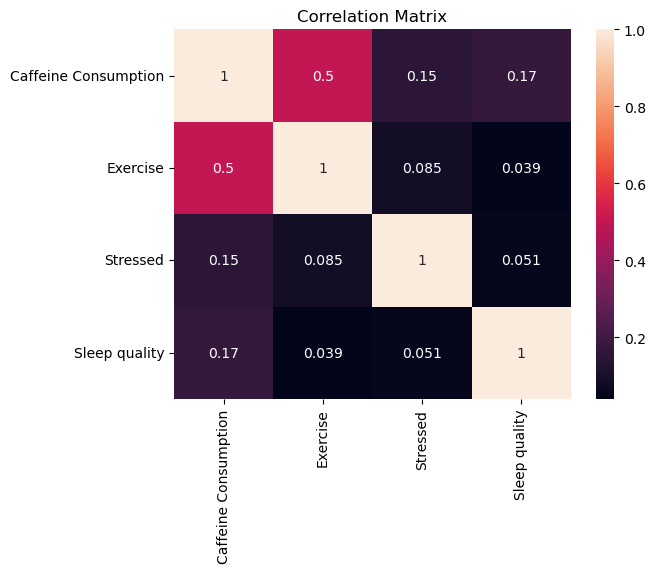

In [42]:
new_columns = ['Caffeine Consumption', 'Exercise', 'Stressed', 'Sleep quality']
corr_matrix2 = df_updated[new_columns].corr()
sns.heatmap(corr_matrix2, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [43]:
df_updated['Exercise'].value_counts()

Exercise
0    523
1    364
Name: count, dtype: int64

In [44]:
# here we check for the importance of all categories of sleep notes
X = df_updated[['Exercise', 'Caffeine Consumption', 'Stressed']]
y = df_updated['Sleep quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_evaluate(X_train, X_test, y_train, y_test, feature_set_name):
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    feats = []
    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Squared Error ({feature_set_name}): {mse}')
    print(f'Mean Absolute Error ({feature_set_name}): {mae}')
    # feature importances
    importances = rf_model.feature_importances_
    feature_names = X_train.columns
    feats = []
    print("Feature Importances:")
    for name, importance in zip(feature_names, importances):
        if importance > 0:
            feats.append(name)
        print(f'{name}: {importance}')
    print()
    return (feats, mse, mae)

# Model with all features
train_and_evaluate(X_train, X_test, y_train, y_test, "All Features")

# Model without "Caffeine Consumption"
X_reduced_caffeine = df_updated[['Exercise', 'Stressed']]
X_train, X_test, y_train, y_test = train_test_split(X_reduced_caffeine, y, test_size=0.2, random_state=42)
train_and_evaluate(X_train, X_test, y_train, y_test, "Without Caffeine Consumption")

# Model without "Stress Levels"
X_reduced_stress = df_updated[['Exercise', 'Caffeine Consumption']]
X_train, X_test, y_train, y_test = train_test_split(X_reduced_stress, y, test_size=0.2, random_state=42)
train_and_evaluate(X_train, X_test, y_train, y_test, "Without Stress Levels")

# Model with only the most important feature ("Caffeine Consumption")
X_reduced_3 = df_updated[['Caffeine Consumption', 'Stressed']]
X_train, X_test, y_train, y_test = train_test_split(X_reduced_3, y, test_size=0.2, random_state=42)
train_and_evaluate(X_train, X_test, y_train, y_test, "Only two most important note categories")

Mean Squared Error (All Features): 261.6434798009639
Mean Absolute Error (All Features): 10.947739374204145
Feature Importances:
Exercise: 0.09128427390305549
Caffeine Consumption: 0.43599131599577745
Stressed: 0.472724410101167

Mean Squared Error (Without Caffeine Consumption): 271.3184952477029
Mean Absolute Error (Without Caffeine Consumption): 11.09333703726298
Feature Importances:
Exercise: 0.4347170444274066
Stressed: 0.5652829555725933

Mean Squared Error (Without Stress Levels): 261.4555834594221
Mean Absolute Error (Without Stress Levels): 10.928394904857127
Feature Importances:
Exercise: 0.16468268103503336
Caffeine Consumption: 0.8353173189649666

Mean Squared Error (Only two most important note categories): 261.5003190266863
Mean Absolute Error (Only two most important note categories): 10.985677417713433
Feature Importances:
Caffeine Consumption: 0.4991578487245844
Stressed: 0.5008421512754155



(['Caffeine Consumption', 'Stressed'], 261.5003190266863, 10.985677417713433)

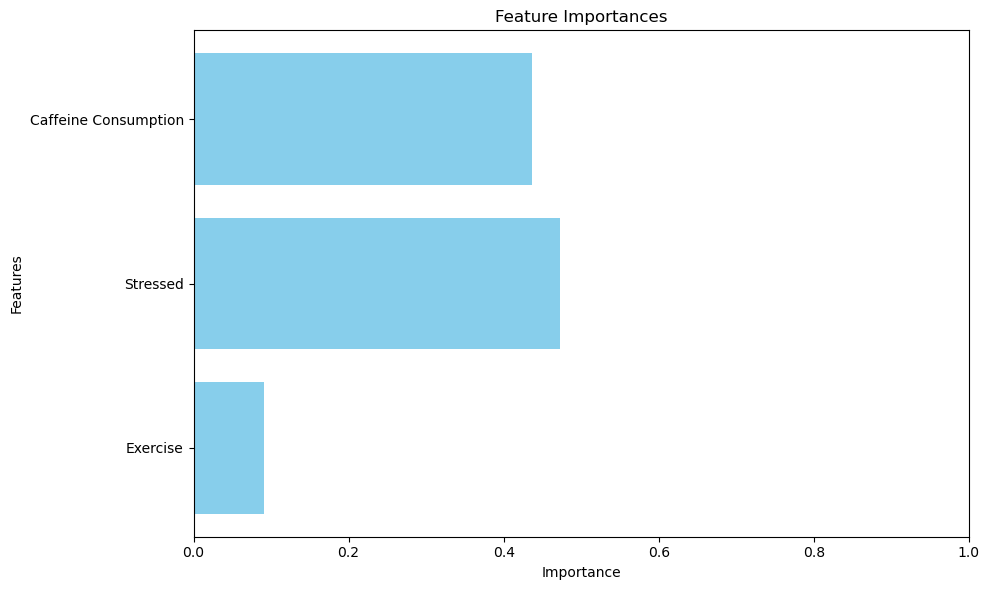

In [45]:
# plot observations for second theory
features = ['Caffeine Consumption', 'Stressed', 'Exercise']
feature_importances = {
    'Exercise' : 0.09128427390305549,
    'Caffeine Consumption' : 0.43599131599577745,
    'Stressed' : 0.472724410101167
}
importances = [feature_importances[feature] for feature in features]
plt.figure(figsize=(10, 6))
plt.xlim(0, 1)  # Adjust the range as necessary
plt.barh(features, importances, color='skyblue')
plt.title(f'Feature Importances')  
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

In [46]:
# determining the time of year based on the start and end
# OBSERVATION 2: SEASONS AND SLEEP QUALITY
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

In [47]:
# converting start and end to right formats and applying the categorize function
df_updated['Start'] = pd.to_datetime(df_updated['Start'])
df_updated['End'] = pd.to_datetime(df_updated['End'])
df_updated['Season'] = df_updated['Start'].dt.month.apply(lambda x: categorize_season(x))
df_updated["Season"].value_counts()

Season
Winter    255
Spring    224
Fall      218
Summer    190
Name: count, dtype: int64

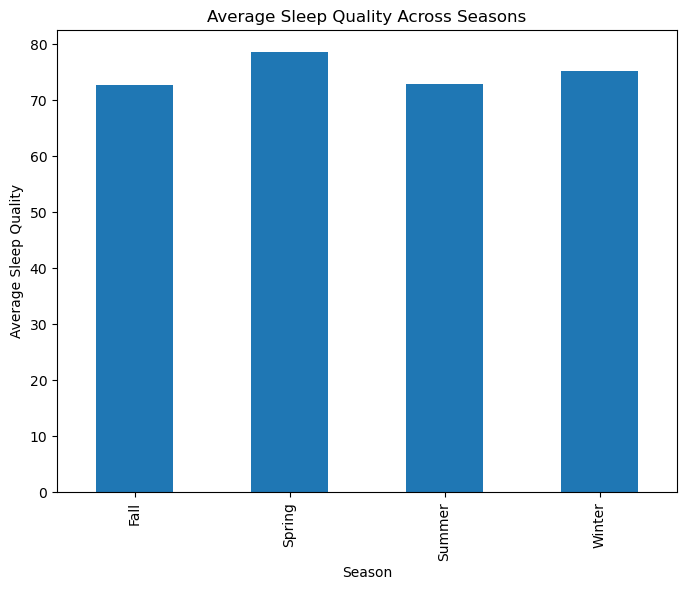

In [48]:
seasonal_quality = df_updated.groupby('Season')['Sleep quality'].mean()

# Plot the seasonal sleep quality
seasonal_quality.plot(kind='bar', figsize=(8, 6))
plt.title('Average Sleep Quality Across Seasons')
plt.xlabel('Season')
plt.ylabel('Average Sleep Quality')
plt.show()

In [49]:

# Perform one-way ANOVA to check if Sleep Quality differs by Season
season_groups = [df_updated[df_updated['Season'] == season]['Sleep quality'] for season in df_updated['Season'].unique()]
anova_result = stats.f_oneway(*season_groups)

print("ANOVA Test Result:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

ANOVA Test Result:
F-statistic: 7.200419266304743
P-value: 8.890549094198538e-05


/opt/software/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


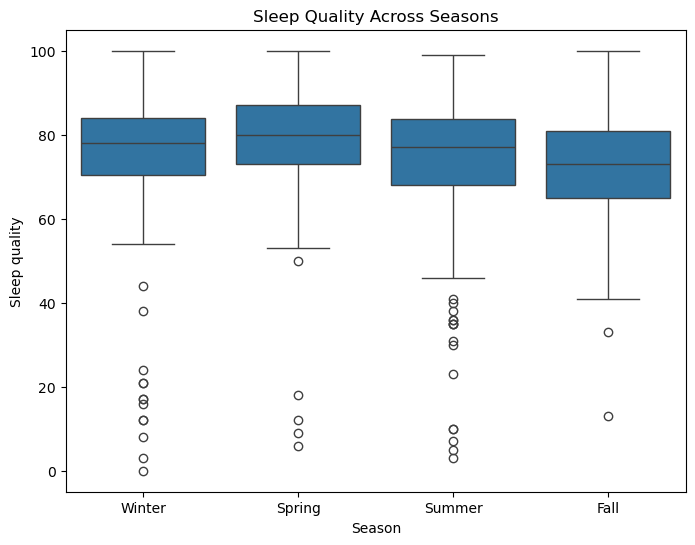

In [50]:
# Boxplot to visualize the distribution of Sleep Quality across different seasons
plt.figure(figsize=(8, 6))
sns.boxplot(x='Season', y='Sleep quality', data=df_updated)
plt.title('Sleep Quality Across Seasons')
plt.show()

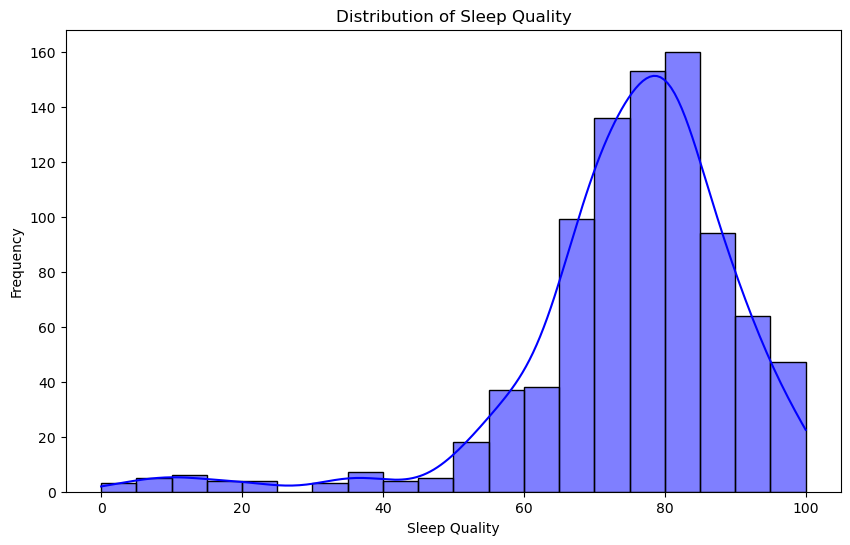

In [51]:
# observation 3: Sleep quality distribution over the time period
plt.figure(figsize=(10, 6))
sns.histplot(df_updated['Sleep quality'], bins=20, kde=True, color='blue')
plt.title("Distribution of Sleep Quality")
plt.xlabel("Sleep Quality")
plt.ylabel("Frequency")
plt.show()

/opt/software/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


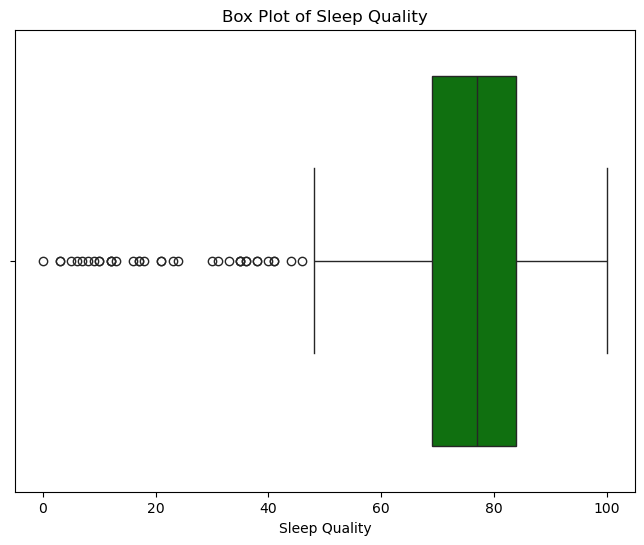

In [52]:
# boxplot 
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_updated['Sleep quality'], color='green')
plt.title("Box Plot of Sleep Quality")
plt.xlabel("Sleep Quality")
plt.show()

In [53]:
sleep_quality_stats = df_updated['Sleep quality'].describe()
print(sleep_quality_stats)

count    887.000000
mean      74.895152
std       15.433292
min        0.000000
25%       69.000000
50%       77.000000
75%       84.000000
max      100.000000
Name: Sleep quality, dtype: float64


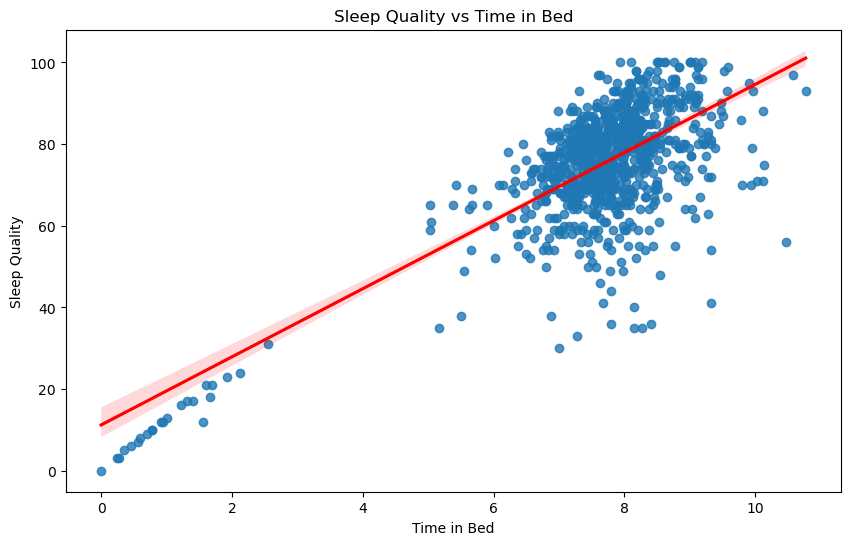

In [54]:
# sleep quality vs time in bed
plt.figure(figsize=(10, 6))
sns.regplot(x='Time in bed', y='Sleep quality', data=df_updated, line_kws={'color': 'red'})

plt.title('Sleep Quality vs Time in Bed')
plt.xlabel('Time in Bed')
plt.ylabel('Sleep Quality')

plt.show()

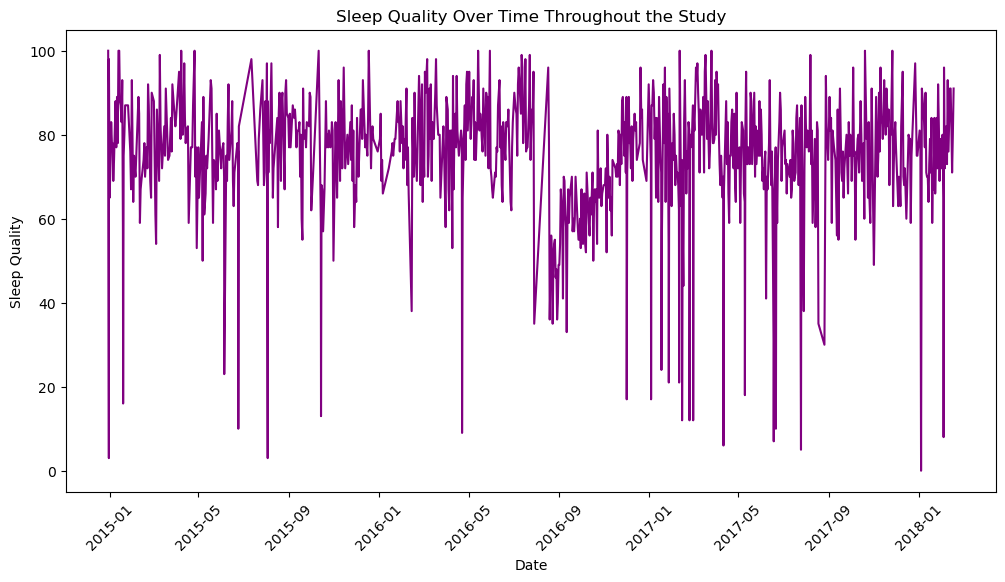

2014-12-29 22:57:49


In [55]:
# how the sleep quality varied over the 4 years
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_updated['Start'], y=df_updated['Sleep quality'], color='purple')
plt.title("Sleep Quality Over Time Throughout the Study")
plt.xlabel("Date")
plt.ylabel("Sleep Quality")
plt.xticks(rotation=45)
plt.show()
print(df_updated['Start'].min())  # Earliest date in the dataset

In [56]:
# dropping irrelevant columns
columns_to_remove = ["Sleep Notes", "Wake up","Activity (steps)"]
df = df_updated.drop(columns_to_remove, axis=1)

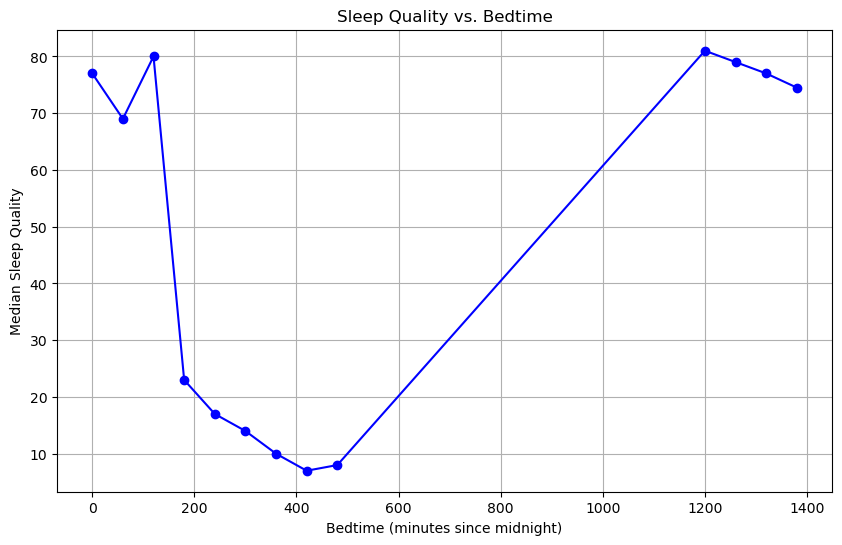

In [57]:
# finding average sleep time for the subject
# calculate the total minutes 
df["BedtimeMinutes"] = pd.to_datetime(df["Start"], format="%H:%M:%S").dt.hour * 60 + pd.to_datetime(df["Start"], format="%H:%M:%S").dt.minute

# divide into 60 min bins
df["BedtimeBin"] = pd.cut(df["BedtimeMinutes"], bins=range(0, 1441, 60), labels=False)

bin_frequencies = df["BedtimeBin"].value_counts()
valid_bins = bin_frequencies[bin_frequencies >=20].index
df_bins_greaterThreshold = df[df["BedtimeBin"].isin(valid_bins)]

bin_median_sleepQ = df.groupby("BedtimeBin")["Sleep quality"].median()

plt.figure(figsize=(10, 6))
plt.plot(bin_median_sleepQ.index * 60, bin_median_sleepQ , marker='o', color='b')
plt.title("Sleep Quality vs. Bedtime")
plt.xlabel("Bedtime (minutes since midnight)")
plt.ylabel("Median Sleep Quality")
plt.grid(True)
plt.show()
# df['BedtimeBin'].value_counts().sort_index()

In [58]:
df.dtypes

Start                   datetime64[ns]
End                     datetime64[ns]
Sleep quality                  float64
Time in bed                    float64
Heart rate                     float64
Caffeine Consumption             int64
Exercise                         int64
Stressed                         int64
Season                          object
BedtimeMinutes                   int32
BedtimeBin                     float64
dtype: object

/opt/software/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


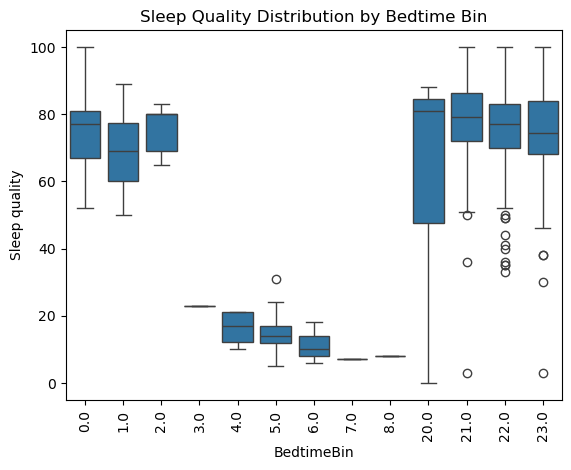

In [59]:
sns.boxplot(x="BedtimeBin", y="Sleep quality", data=df)
plt.xticks(rotation=90)  # Rotate bin labels for clarity
plt.title("Sleep Quality Distribution by Bedtime Bin")
plt.show()

In [60]:
# to detect number of outliers
# df_bins_greaterThreshold['BedtimeBin'].value_counts()
# q1 = df_bins_greaterThreshold['Sleep quality'].quantile(0.25)
# q3 = df_bins_greaterThreshold['Sleep quality'].quantile(0.75)
# IQR = q3 - q1

# lower_bound = q1 - 1.5 * IQR
# upper_bound = q3 + 1.5 * IQR

# without_outliers = df_bins_greaterThreshold[
#     (df_bins_greaterThreshold['Sleep quality'] > lower_bound) |
#     (df_bins_greaterThreshold['Sleep quality'] < upper_bound)
# ]
# outliers = df_bins_greaterThreshold[
#     (df_bins_greaterThreshold['Sleep quality'] < lower_bound) |
#     (df_bins_greaterThreshold['Sleep quality'] > upper_bound)
# ]
# wtihout_outliers['Sleep quality'].mean()

In [61]:
df['Time in bed'].mean()

7.633979706877114

In [62]:
# predicting sleep scores 
df_clustering = df.copy() #.drop(['Activity (steps)'])
season_mapping = {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3}
df_clustering['Season'] = df_clustering['Season'].map(season_mapping)
X = df_clustering[['Sleep quality','Caffeine Consumption','Time in bed', 'Heart rate', 'Stressed','Exercise','Season']] 

In [63]:
X

,Sleep quality,Caffeine Consumption,Time in bed,Heart rate,Stressed,Exercise,Season
0,100.0,0,8.53,59.0,0,0,0
1,3.0,0,0.27,72.0,1,0,0
2,98.0,0,8.50,57.0,0,0,0
3,65.0,0,7.53,60.0,0,0,0
4,72.0,1,6.73,68.0,0,0,0
...,...,...,...,...,...,...,...
882,91.0,0,9.13,60.0,0,0,0
883,81.0,0,7.18,60.0,0,0,0
884,71.0,0,8.93,60.0,0,0,0
885,80.0,0,9.22,60.0,0,0,0


In [64]:
def k_means(X, k):
    kmeans = KMeans(n_clusters=k, n_init = 100, max_iter=10000, random_state=42)
    kmeans.fit_transform(X)
    clusters = kmeans.labels_
    return clusters

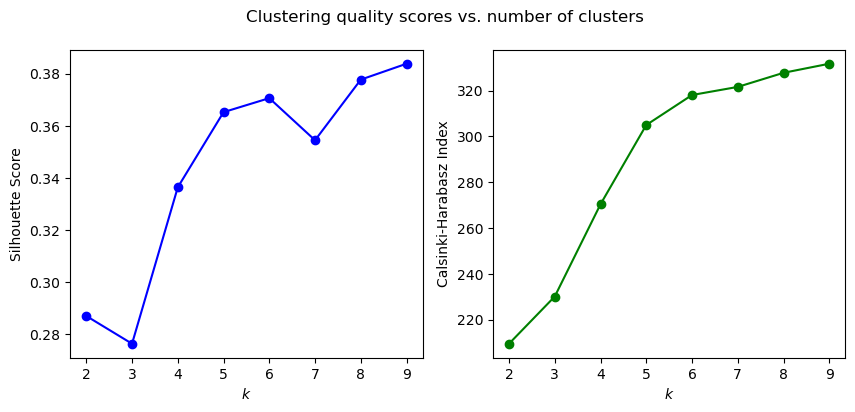

In [65]:
# finding the optimal k

silhouette_scores = []
calsinki_indices = []
k_range = range(2,10)
# scaling the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)
for k in k_range:
    kmeans =  k_means(X_scaled, k)
    sil_score = silhouette_score(X_scaled, kmeans) 
    ch_score = calinski_harabasz_score(X_scaled, kmeans)
    calsinki_indices.append(ch_score)
    silhouette_scores.append(sil_score)


axs[0].plot(k_range, silhouette_scores, marker='o', color='b')
axs[1].plot(k_range, calsinki_indices,  marker='o', color='g')
axs[0].set_xlabel("$k$"), axs[1].set_xlabel("$k$")
axs[0].set_ylabel("Silhouette Score")
axs[1].set_ylabel("Calsinki-Harabasz Index")
fig.suptitle("Clustering quality scores vs. number of clusters")
plt.show()

In [66]:
df_new = X_scaled.copy()
df_clustering['Cluster'] = k_means(df_new, k=5)

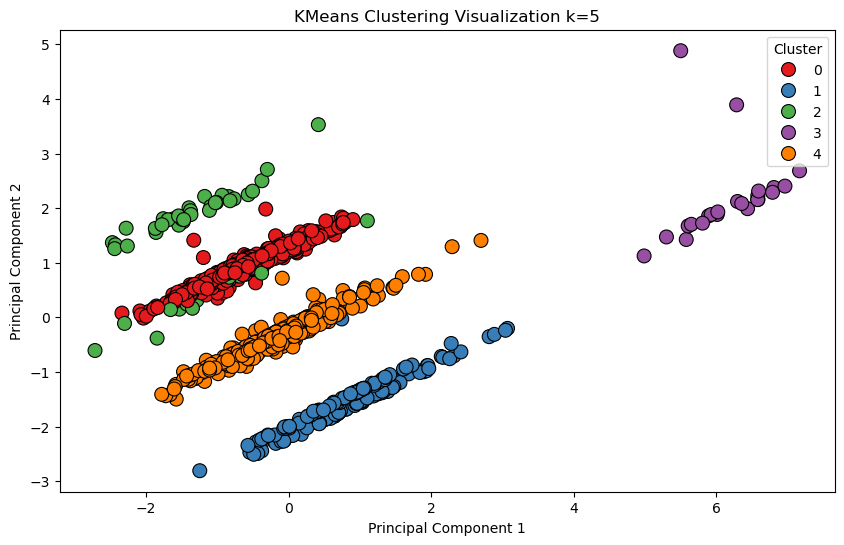

In [67]:
#performing pca to visualize the clusters

pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df_new) 

# Add the cluster labels to the dataframe
df_reduced = pd.DataFrame(df_reduced, columns=['PCA1', 'PCA2'])
df_reduced['Cluster'] = df_clustering['Cluster']

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_reduced, palette='Set1', s=100, edgecolor='k')
plt.title('KMeans Clustering Visualization k=5')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [68]:
# check this again
y = df_clustering['Sleep quality']
X = df_clustering[['Time in bed', 'Heart rate', 'Caffeine Consumption','Stressed','Exercise', 'Season']] 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)
train_and_evaluate(X_train, X_test, y_train,y_test, 'With all Features')

Mean Squared Error (With all Features): 115.67813700285217
Mean Absolute Error (With all Features): 8.09172480827537
Feature Importances:
Time in bed: 0.7886261700805677
Heart rate: 0.057515335638853984
Caffeine Consumption: 0.03173755990324683
Stressed: 0.015992065197578627
Exercise: 0.030698120406614033
Season: 0.07543074877313904



(['Time in bed',
  'Heart rate',
  'Caffeine Consumption',
  'Stressed',
  'Exercise',
  'Season'],
 115.67813700285217,
 8.09172480827537)

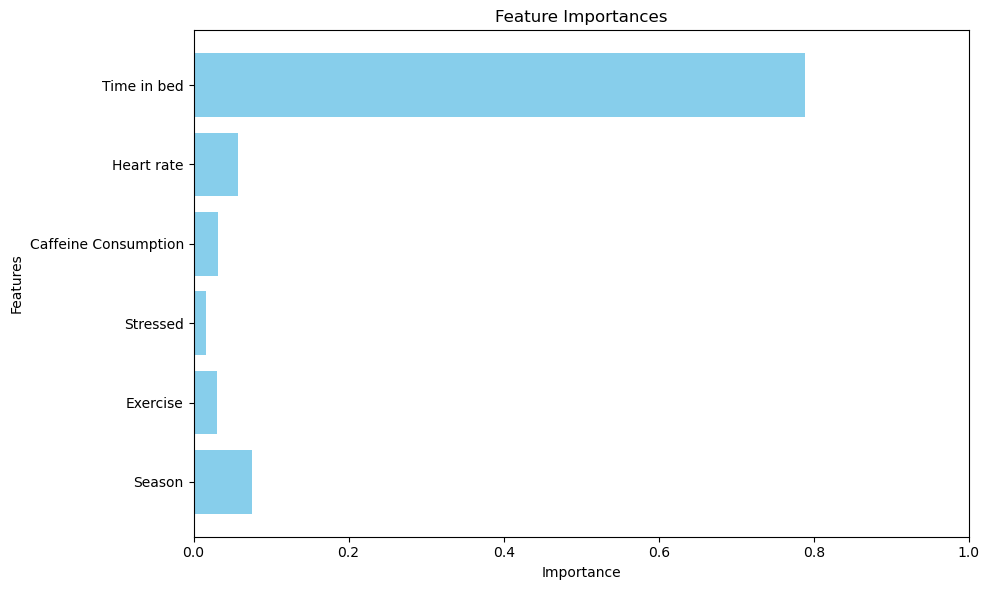

In [70]:
features = ['Time in bed', 'Heart rate', 'Caffeine Consumption', 'Stressed', 'Exercise', 'Season']
feature_importances = {
    'Time in bed': 0.7886261700805677,
    'Heart rate': 0.057515335638853984,
    'Caffeine Consumption': 0.03173755990324683,
    'Stressed': 0.015992065197578627,
    'Exercise': 0.030698120406614033,
    'Season': 0.07543074877313904
}

importances = [feature_importances[feature] for feature in features]

plt.figure(figsize=(10, 6))
plt.xlim(0, 1)  # Adjust the range as necessary
plt.barh(features, importances, color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


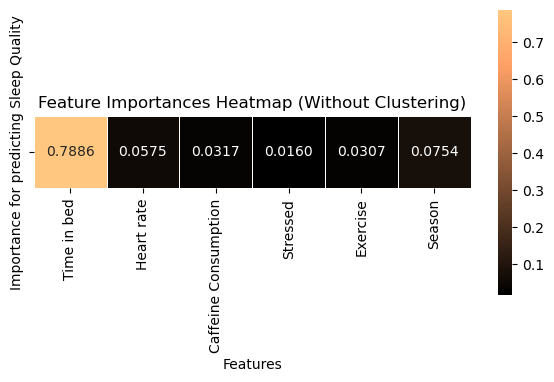

In [71]:
features = ['Time in bed', 'Heart rate', 'Caffeine Consumption', 'Stressed', 'Exercise', 'Season']
importances = [0.7886261700805677, 0.057515335638853984, 0.03173755990324683, 
               0.015992065197578627, 0.030698120406614033, 0.07543074877313904]

importance_data = pd.DataFrame(importances, columns=['Importance for predicting Sleep Quality'], index=features)

# Create a heatmap
plt.figure(figsize=(6, 6))  # Adjusted to create a square plot
sns.heatmap(importance_data.T, annot=True, cmap='copper', cbar=True, fmt='.4f', linewidths=0.5, square=True,cbar_kws={'shrink': 0.5})
plt.title('Feature Importances Heatmap (Without Clustering)')
plt.xlabel('Features')
# plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [72]:
weight_time_in_bed = round(0.7886261700805677, 2)
weight_heart_rate = round(0.057515335638853984, 2)
weight_caffeine_consumption = round(0.03173755990324683, 2)
weight_stressed = round(0.015992065197578627, 2)
weight_exercise = round(0.030698120406614033,2)
weight_season = round(0.07543074877313904,2)


df_clustering['Sleep Score'] = (weight_season * df_clustering['Season'] +
                                 weight_time_in_bed * df_clustering['Time in bed'] +
                                 weight_heart_rate * df_clustering['Heart rate'] +
                                 weight_caffeine_consumption * df_clustering['Caffeine Consumption'] +
                                 weight_stressed * df_clustering['Stressed'] +
                                 weight_exercise * df_clustering['Exercise'])

# scaling the weighted score to get a score in range 0-100
min_score = df_clustering['Sleep Score'].min()
max_score = df_clustering['Sleep Score'].max()


df_clustering['Normalized Sleep Score'] = (df_clustering['Sleep Score'] - min_score) / (max_score - min_score) * 100.0

In [73]:
df_clustering

,Start,End,Sleep quality,Time in bed,Heart rate,Caffeine Consumption,Exercise,Stressed,Season,BedtimeMinutes,BedtimeBin,Cluster,Sleep Score,Normalized Sleep Score
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100.0,8.53,59.0,0,0,0,0,1377,22.0,1,10.2787,75.713638
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3.0,0.27,72.0,0,0,1,0,1277,21.0,3,4.5533,10.807165
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98.0,8.50,57.0,0,0,0,0,1362,22.0,1,10.1350,74.084571
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65.0,7.53,60.0,0,0,0,0,1351,22.0,1,9.5487,67.437932
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72.0,6.73,68.0,1,0,0,0,1332,22.0,4,9.4267,66.054869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,2018-02-12 21:54:14,2018-02-13 07:02:15,91.0,9.13,60.0,0,0,0,0,1314,21.0,1,10.8127,81.767373
883,2018-02-13 23:49:19,2018-02-14 07:00:53,81.0,7.18,60.0,0,0,0,0,1429,23.0,1,9.2722,64.303367
884,2018-02-14 21:24:05,2018-02-15 06:20:52,71.0,8.93,60.0,0,0,0,0,1284,21.0,1,10.6547,79.976193
885,2018-02-15 21:36:32,2018-02-16 06:50:31,80.0,9.22,60.0,0,0,0,0,1296,21.0,1,10.8838,82.573404


In [74]:
#FEATURES USED
# DO NOT RUN THIS
# X = df_clustering[['Time in bed', 'Heart rate', 'Caffeine Consumption','Stressed','Exercise', 'Season']] 

In [75]:
# trying to find the feature importance for each cluster to get custom weights

cluster0 = df_clustering[df_clustering['Cluster'] == 0][['Time in bed', 'Heart rate', 'Caffeine Consumption','Stressed','Exercise', 'Season']] 
cluster1 = df_clustering[df_clustering['Cluster'] == 1][['Time in bed', 'Heart rate', 'Caffeine Consumption','Stressed','Exercise', 'Season']] 
cluster2 = df_clustering[df_clustering['Cluster'] == 2][['Time in bed', 'Heart rate', 'Caffeine Consumption','Stressed','Exercise', 'Season']] 
cluster3 = df_clustering[df_clustering['Cluster'] == 3][['Time in bed', 'Heart rate', 'Caffeine Consumption','Stressed','Exercise', 'Season']] 
cluster4 = df_clustering[df_clustering['Cluster'] == 4][['Time in bed', 'Heart rate', 'Caffeine Consumption','Stressed','Exercise', 'Season']] 


In [76]:
cluster0.head()

,Time in bed,Heart rate,Caffeine Consumption,Stressed,Exercise,Season
8,7.45,56.0,1,0,1,0
9,7.58,64.0,1,0,1,0
15,9.18,65.0,1,0,1,0
17,7.22,60.0,1,0,1,0
23,8.00,54.0,1,0,1,0


In [77]:
k_range = range(0,5)
# clusters = {
#     0: cluster0,
#     1: cluster1,
#     2: cluster2,
#     3: cluster3,
#     4: cluster4
# }
clusters = {
    0: cluster0,
    1: cluster1,
    2: cluster2,
    3: cluster3,
    4: cluster4,
}
for k in k_range:
    X = clusters[k]
    y = df_clustering[df_clustering['Cluster'] == k]['Sleep quality']
    print(f'Splitting and scaling data for cluster {k}\n')
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)
    print(train_and_evaluate(X_train, X_test, y_train,y_test, f'Feature importance Cluster {k}'))

Splitting and scaling data for cluster 0

Mean Squared Error (Feature importance Cluster 0): 118.87587733596474
Mean Absolute Error (Feature importance Cluster 0): 8.234947751322753
Feature Importances:
Time in bed: 0.6833067340111828
Heart rate: 0.12998642587754122
Caffeine Consumption: 0.0
Stressed: 0.0
Exercise: 0.0
Season: 0.18670684011127592

(['Time in bed', 'Heart rate', 'Season'], 118.87587733596474, 8.234947751322753)
Splitting and scaling data for cluster 1

Mean Squared Error (Feature importance Cluster 1): 107.07709114663461
Mean Absolute Error (Feature importance Cluster 1): 7.659861975234069
Feature Importances:
Time in bed: 0.8688991029934717
Heart rate: 0.0341573823754528
Caffeine Consumption: 0.0
Stressed: 0.0
Exercise: 0.00045646700714913394
Season: 0.09648704762392639

(['Time in bed', 'Heart rate', 'Exercise', 'Season'], 107.07709114663461, 7.659861975234069)
Splitting and scaling data for cluster 2

Mean Squared Error (Feature importance Cluster 2): 217.18276226851

In [78]:
cluster_feature_importance = {

    0:[0.6833067340111828, 0.12998642587754122, 0.0, 0.0, 0.0, 0.18670684011127592],
    1:[0.8688991029934717, 0.0341573823754528, 0.0, 0.0, 0.00045646700714913394, 0.09648704762392639],
    2:[0.6747097196605184, 0.1473154339555884, 0.0, 0.0, 0.06624304991590622, 0.11173179646798691],
    3: [0.963274979062769, 0.010235535306143304,  0.0021084900697291927,0.0, 0.00491267794665055, 0.019468317614707926],
    4: [0.7032429707687106,  0.10016138032641865, 0.0, 0.0, 0.0,  0.19659564890487083]
}


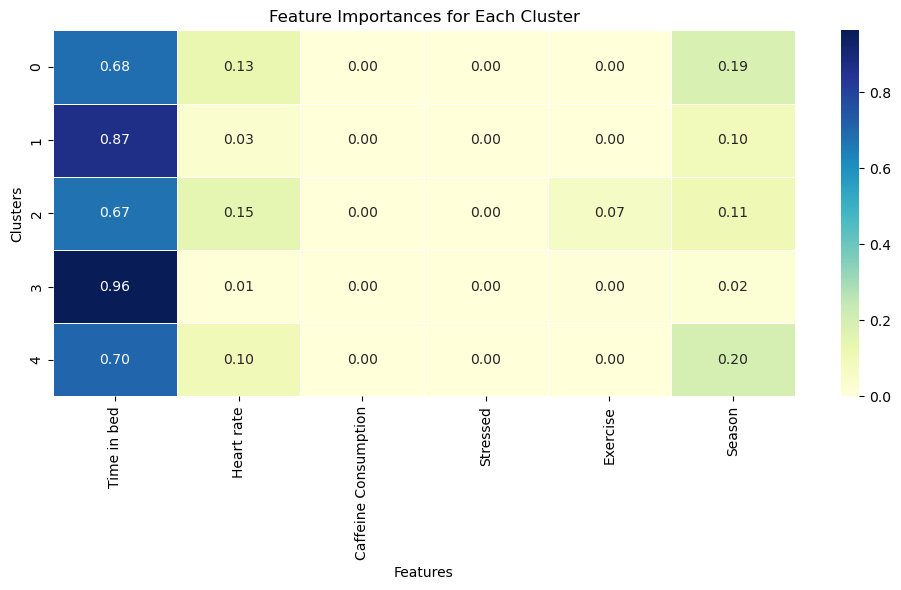

In [79]:
df_importance = pd.DataFrame(cluster_feature_importance).T
df_importance.columns = ['Time in bed', 'Heart rate', 'Caffeine Consumption', 'Stressed', 'Exercise', 'Season']
plt.figure(figsize=(10, 6))
sns.heatmap(df_importance, annot=True, cmap='YlGnBu', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Feature Importances for Each Cluster')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.tight_layout()
plt.show()

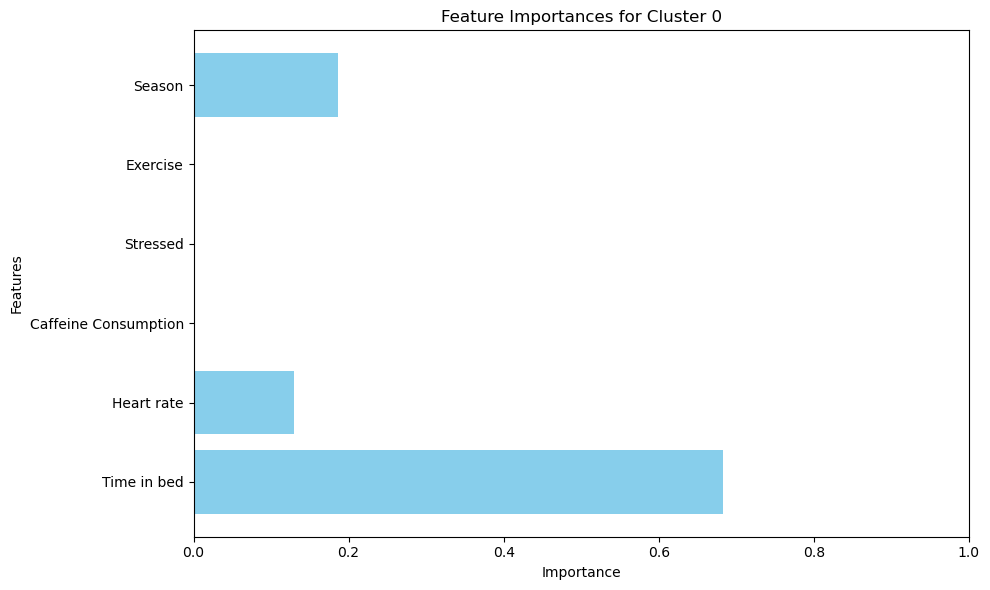

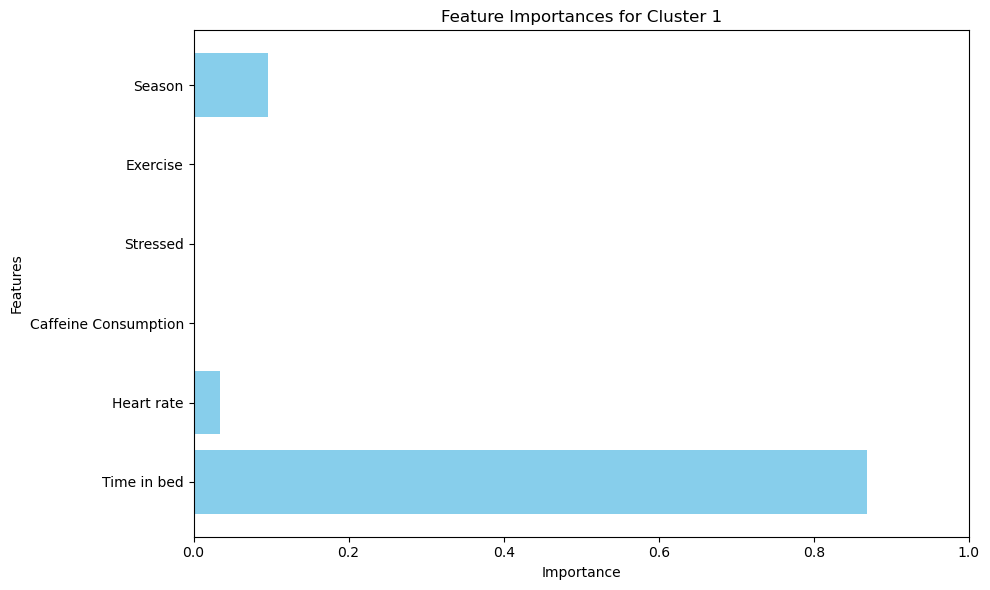

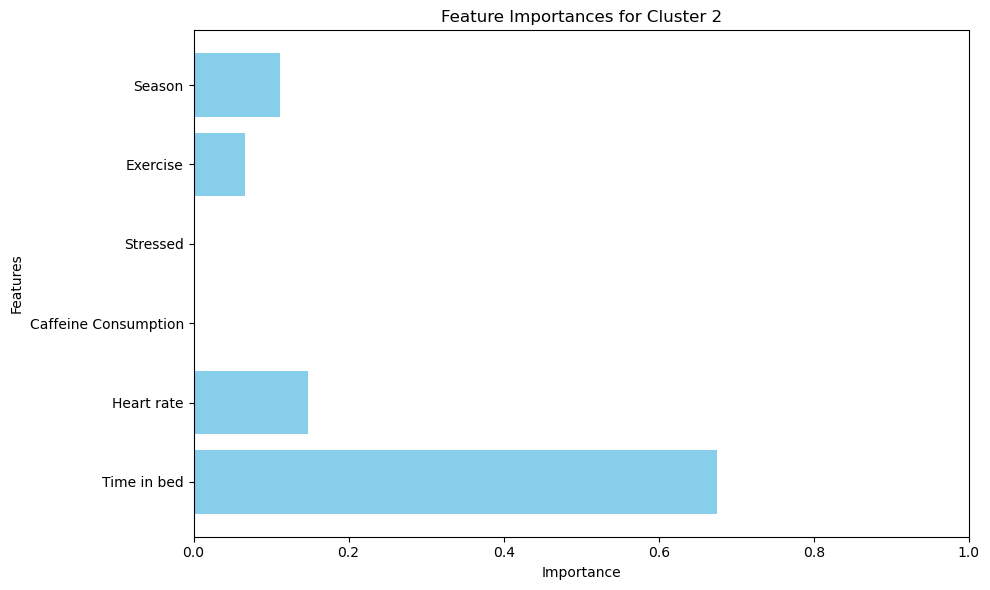

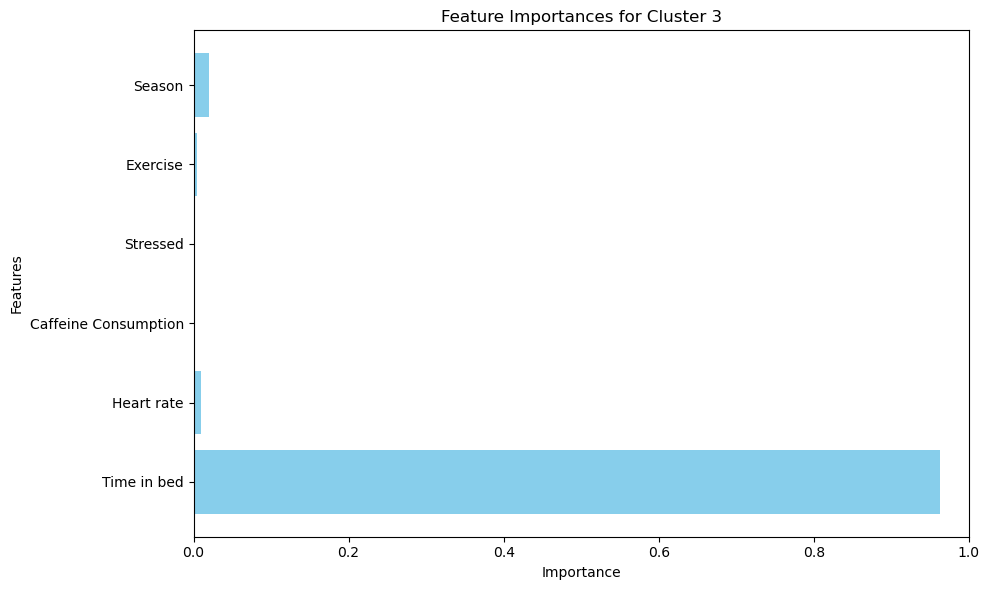

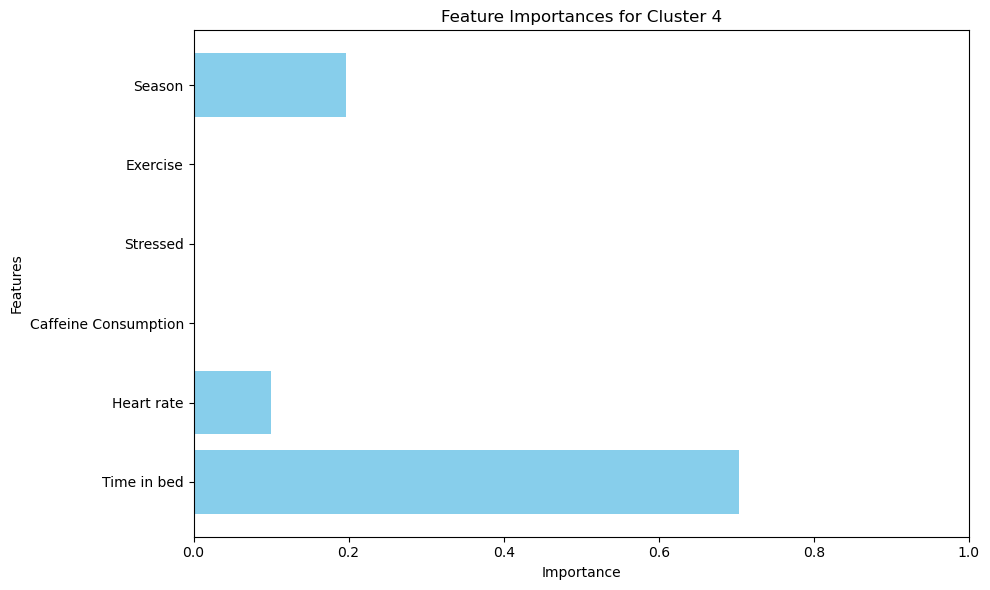

In [80]:
features = ['Time in bed', 'Heart rate', 'Caffeine Consumption', 'Stressed', 'Exercise', 'Season']

# plots to visualize how each feature contributes in clusters
for cluster_id, importances in cluster_feature_importance.items():
    plt.figure(figsize=(10, 6))
    plt.xlim(0, 1)  # Adjust the range as necessary
    plt.barh(features, importances, color='skyblue')
    plt.title(f'Feature Importances for Cluster {cluster_id}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.gca().invert_yaxis
    plt.tight_layout()
    plt.show()

In [81]:
# determining a sleep score based on the clusters
for cluster_id, importances in cluster_feature_importance.items():
    weight_time_in_bed = round(importances[0], 2)
    weight_heart_rate = round(importances[1], 2)
    weight_caffeine_consumption = round(importances[2], 2)
    weight_stressed = round(importances[3], 2)
    weight_exercise = round(importances[4],2)
    weight_season = round(importances[5],2)
    
    cluster_data = clusters[cluster_id]
    clusters[cluster_id]['Sleep Score (cluster based)'] = (weight_season * cluster_data['Season'] + weight_time_in_bed * cluster_data['Time in bed'] +
        weight_heart_rate * cluster_data['Heart rate'] +
        weight_caffeine_consumption  * cluster_data['Caffeine Consumption'] +
         weight_stressed* cluster_data['Stressed'] +
        weight_exercise * cluster_data['Exercise'])
    
    # normalizing
    min_score = cluster_data['Sleep Score (cluster based)'].min()
    max_score = cluster_data['Sleep Score (cluster based)'].max()
    clusters[cluster_id]['Normalized Sleep Score (cluster based)'] = (
    (cluster_data['Sleep Score (cluster based)'] - min_score) /
    (max_score - min_score) * 100.0)

In [82]:
# mapping back to original dataframe
df_clustering['Normalized Sleep Score (based on cluster)'] = df_clustering.apply(
    lambda row: clusters[row['Cluster']]['Normalized Sleep Score (cluster based)'].loc[row.name],
    axis=1
)

In [83]:
df_clustering

,Start,End,Sleep quality,Time in bed,Heart rate,Caffeine Consumption,Exercise,Stressed,Season,BedtimeMinutes,BedtimeBin,Cluster,Sleep Score,Normalized Sleep Score,Normalized Sleep Score (based on cluster)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100.0,8.53,59.0,0,0,0,0,1377,22.0,1,10.2787,75.713638,60.030415
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3.0,0.27,72.0,0,0,1,0,1277,21.0,3,4.5533,10.807165,15.241158
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98.0,8.50,57.0,0,0,0,0,1362,22.0,1,10.1350,74.084571,58.132769
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65.0,7.53,60.0,0,0,0,0,1351,22.0,1,9.5487,67.437932,41.516794
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72.0,6.73,68.0,1,0,0,0,1332,22.0,4,9.4267,66.054869,38.227848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,2018-02-12 21:54:14,2018-02-13 07:02:15,91.0,9.13,60.0,0,0,0,0,1314,21.0,1,10.8127,81.767373,72.196509
883,2018-02-13 23:49:19,2018-02-14 07:00:53,81.0,7.18,60.0,0,0,0,0,1429,23.0,1,9.2722,64.303367,34.805607
884,2018-02-14 21:24:05,2018-02-15 06:20:52,71.0,8.93,60.0,0,0,0,0,1284,21.0,1,10.6547,79.976193,68.361545
885,2018-02-15 21:36:32,2018-02-16 06:50:31,80.0,9.22,60.0,0,0,0,0,1296,21.0,1,10.8838,82.573404,73.922243


In [84]:
cluster_labels = {0:'Sleep highly influenced by Time in bed and Season',
                  1: 'Sleep moderately influenced by Time in bed, Season and Heart rate',
                  2: 'Sleep quality varies',
                  3: 'Sleep highly influenced by Time in bed',
                  4: 'Sleep sligthly more influenced by Heart rate'
                 }

df_clustering_new = df_clustering.copy()
df_clustering['Cluster'] = df_clustering_new['Cluster'].map(cluster_labels)

In [85]:
df_clustering

,Start,End,Sleep quality,Time in bed,Heart rate,Caffeine Consumption,Exercise,Stressed,Season,BedtimeMinutes,BedtimeBin,Cluster,Sleep Score,Normalized Sleep Score,Normalized Sleep Score (based on cluster)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100.0,8.53,59.0,0,0,0,0,1377,22.0,"Sleep moderately influenced by Time in bed, Se...",10.2787,75.713638,60.030415
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3.0,0.27,72.0,0,0,1,0,1277,21.0,Sleep highly influenced by Time in bed,4.5533,10.807165,15.241158
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98.0,8.50,57.0,0,0,0,0,1362,22.0,"Sleep moderately influenced by Time in bed, Se...",10.1350,74.084571,58.132769
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65.0,7.53,60.0,0,0,0,0,1351,22.0,"Sleep moderately influenced by Time in bed, Se...",9.5487,67.437932,41.516794
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72.0,6.73,68.0,1,0,0,0,1332,22.0,Sleep sligthly more influenced by Heart rate,9.4267,66.054869,38.227848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,2018-02-12 21:54:14,2018-02-13 07:02:15,91.0,9.13,60.0,0,0,0,0,1314,21.0,"Sleep moderately influenced by Time in bed, Se...",10.8127,81.767373,72.196509
883,2018-02-13 23:49:19,2018-02-14 07:00:53,81.0,7.18,60.0,0,0,0,0,1429,23.0,"Sleep moderately influenced by Time in bed, Se...",9.2722,64.303367,34.805607
884,2018-02-14 21:24:05,2018-02-15 06:20:52,71.0,8.93,60.0,0,0,0,0,1284,21.0,"Sleep moderately influenced by Time in bed, Se...",10.6547,79.976193,68.361545
885,2018-02-15 21:36:32,2018-02-16 06:50:31,80.0,9.22,60.0,0,0,0,0,1296,21.0,"Sleep moderately influenced by Time in bed, Se...",10.8838,82.573404,73.922243


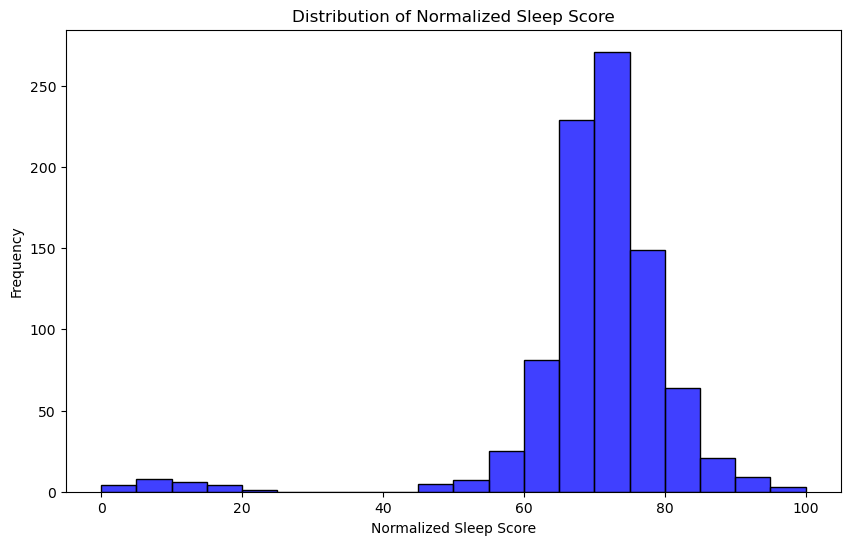

In [86]:
#distribution of sleep scores before clustering
plt.figure(figsize=(10, 6))
sns.histplot(df_clustering['Normalized Sleep Score'], bins=20 ,color='blue')
plt.title("Distribution of Normalized Sleep Score")
plt.xlabel("Normalized Sleep Score")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Frequency')

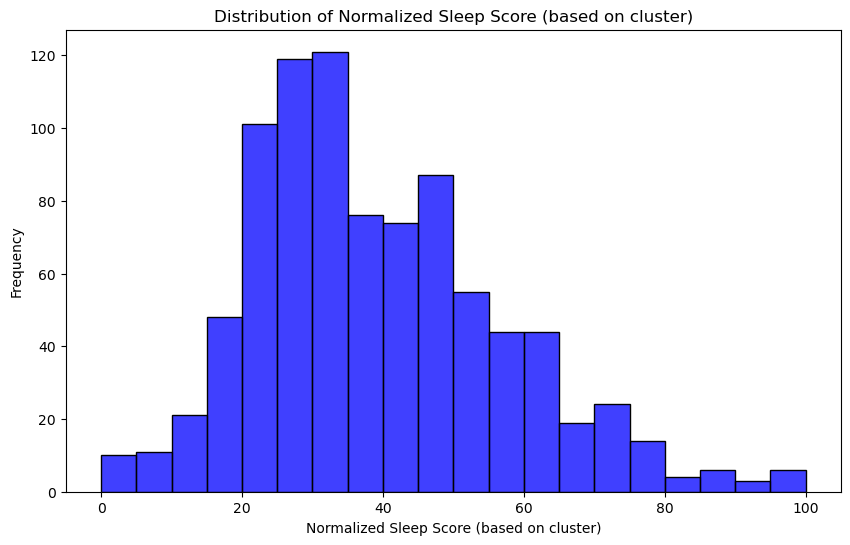

In [87]:
#distribution of sleep scores after clustering
plt.figure(figsize=(10, 6))
sns.histplot(df_clustering['Normalized Sleep Score (based on cluster)'], bins=20,  color='blue')
plt.title("Distribution of Normalized Sleep Score (based on cluster)")
plt.xlabel("Normalized Sleep Score (based on cluster)")
plt.ylabel("Frequency")

In [88]:
df_clustering['Cluster'].value_counts()

Cluster
Sleep highly influenced by Time in bed and Season                    329
Sleep sligthly more influenced by Heart rate                         263
Sleep moderately influenced by Time in bed, Season and Heart rate    215
Sleep quality varies                                                  57
Sleep highly influenced by Time in bed                                23
Name: count, dtype: int64

In [89]:
# df_clustering.columns

/tmp/ipykernel_283/2330506747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Normalized Sleep Score (based on cluster)', data=cluster_avg_sleep_scores,palette='Set2')
/opt/software/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/software/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/software/lib/python3.10/site-packages/

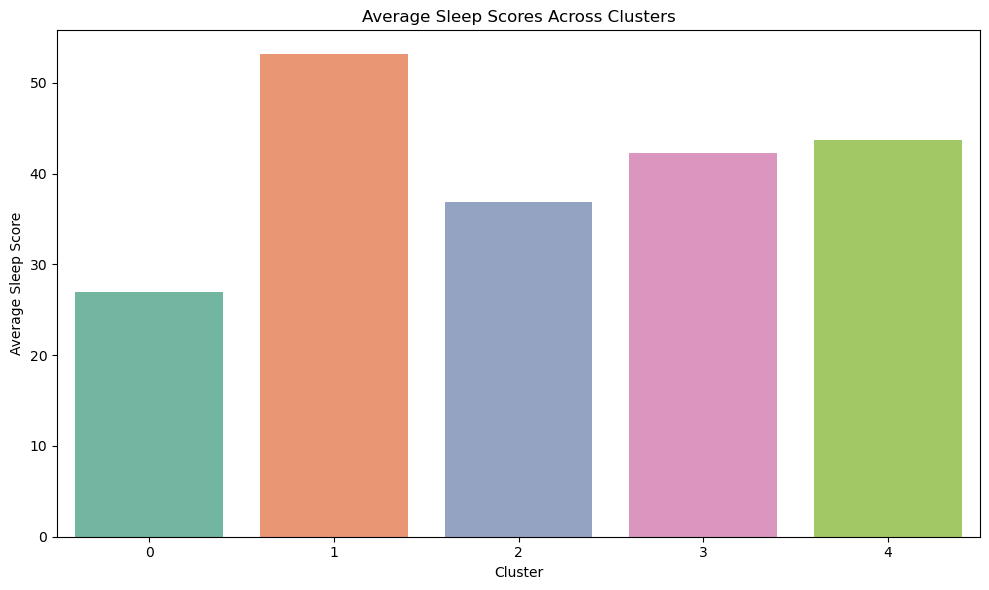

In [90]:
plt.figure(figsize=(10, 6))
cluster_avg_sleep_scores = df_clustering_new.groupby('Cluster')['Normalized Sleep Score (based on cluster)'].mean().reset_index()
sns.barplot(x='Cluster', y='Normalized Sleep Score (based on cluster)', data=cluster_avg_sleep_scores,palette='Set2')
plt.title('Average Sleep Scores Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Sleep Score')
plt.tight_layout()
plt.show()

/tmp/ipykernel_283/125678923.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Normalized Sleep Score (based on cluster)', data=df_clustering_new,palette='Set2')
/opt/software/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/software/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/software/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, y

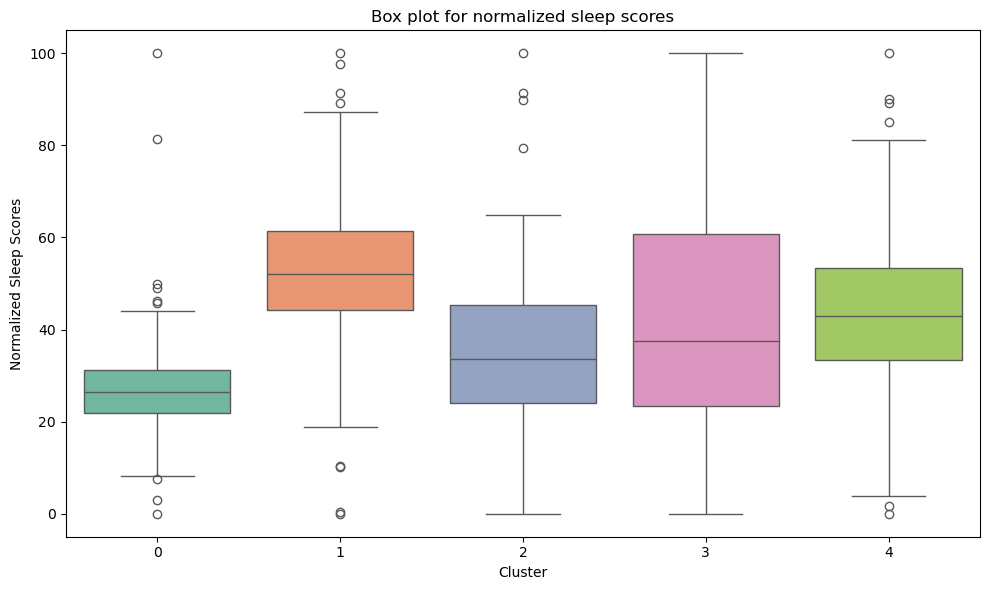

In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Normalized Sleep Score (based on cluster)', data=df_clustering_new,palette='Set2')
plt.title('Box plot for normalized sleep scores')
plt.xlabel('Cluster')
plt.ylabel('Normalized Sleep Scores')
plt.tight_layout()
plt.show()

In [92]:
# df_clustering['Cluster'].value_counts()